In [279]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex=True)

from __future__ import division
import sympy as sym
from sympy import *

%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'serif','size'   : 12})

In [280]:
import scipy.integrate as integrate
import scipy.special as special
from cmath import sin, cos, exp

# General integral, return (real part, imaginary part)
# All angles are in radians

def I0(u, v, alpha):
    return (integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).real * cos(x) ** (0.5) * sin(x) * (1 + cos(x)) * special.jv(0, v * sin(x) / sin(alpha)), 0, alpha), integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).imag * cos(x) ** (0.5) * sin(x) * (1 + cos(x)) * special.jv(0, v * sin(x) / sin(alpha)), 0, alpha))

def I1(u, v, alpha):
    return (integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).real * cos(x) ** (0.5) * sin(x) ** 2 * special.jv(1, v * sin(x) / sin(alpha)), 0, alpha), integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).imag * cos(x) ** (0.5) * sin(x) ** 2 * special.jv(1, v * sin(x) / sin(alpha)), 0, alpha))

def I2(u, v, alpha):
    return (integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).real * cos(x) ** (0.5) * sin(x) * (1 - cos(x)) * special.jv(2, v * sin(x) / sin(alpha)), 0, alpha), integrate.quad(lambda x: exp(1j * u * cos(x) / (sin(alpha)) ** 2).imag * cos(x) ** (0.5) * sin(x) * (1 - cos(x)) * special.jv(2, v * sin(x) / sin(alpha)), 0, alpha))

In [191]:
from math import pi, sqrt
from numpy import conj, divide

def Ex(u, v, phi, alpha, A):
    return (A * (I0(u, v, alpha)[1][0] + I2(u, v, alpha)[1][0] * cos(2 * phi)).real + 1j * -1 * A * (I0(u, v, alpha)[0][0] + I2(u, v, alpha)[0][0] * cos(2 * phi)).real)

def Ey(u, v, phi, alpha, A):
    return (A * I2(u, v, alpha)[1][0] * sin(2 * phi).real - 1j * A * I2(u, v, alpha)[0][0] * sin(2 * phi).real)

def Ez(u, v, phi, alpha, A):
    return (-2 * A * I1(u, v, alpha)[0][0] * cos(phi).real - 2j * A * I1(u, v, alpha)[1][0] * cos(phi).real)

def Ellip(u, v, phi, alpha, A):
    return ((Ey(u, v, phi, alpha, A) * conj(Ez(u, v, phi, alpha, A)) - Ez(u, v, phi, alpha, A) * conj(Ey(u, v, phi, alpha, A))).imag, (Ez(u, v, phi, alpha, A) * conj(Ex(u, v, phi, alpha, A)) - Ex(u, v, phi, alpha, A) * conj(Ez(u, v, phi, alpha, A))).imag, (Ex(u, v, phi, alpha, A) * conj(Ey(u, v, phi, alpha, A)) - Ey(u, v, phi, alpha, A) * conj(Ex(u, v, phi, alpha, A))).imag)
    
def E(u, v, phi, alpha, A):
    return sqrt(Ex(u, v, phi, alpha, A) * conj(Ex(u, v, phi, alpha, A)) + Ey(u, v, phi, alpha, A) * conj(Ey(u, v, phi, alpha, A)) + Ez(u, v, phi, alpha, A) * conj(Ez(u, v, phi, alpha, A)))

def Ex_norm(u, v, phi, alpha, A):
    return Ex(u, v, phi, alpha, A) / E(u, v, phi, alpha, A)

def Ey_norm(u, v, phi, alpha, A):
    return Ey(u, v, phi, alpha, A) / E(u, v, phi, alpha, A)

def Ez_norm(u, v, phi, alpha, A):
    return Ez(u, v, phi, alpha, A) / E(u, v, phi, alpha, A)

def Ellip_norm(u, v, phi, alpha, A):
    return divide(Ellip(u, v, phi, alpha, A), E(u, v, phi, alpha, A) ** 2)

In [156]:
print(Ey_norm(0 ,2, 2, 0.55, 1))
print(E(1, 1, 1, 0.55, 1))

(0.0129372154188+0j)
0.23816564983


/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


In [12]:
from numpy import angle

def z2polar(x, y):
    z = x + 1j * y
    return (abs(z), angle(z))

def polar2z(r, theta):
    return (r * cos(theta), r * sin(theta))

print(z2polar(0,4))
print(pi)

(4.0, 1.5707963267948966)
3.14159265359


/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


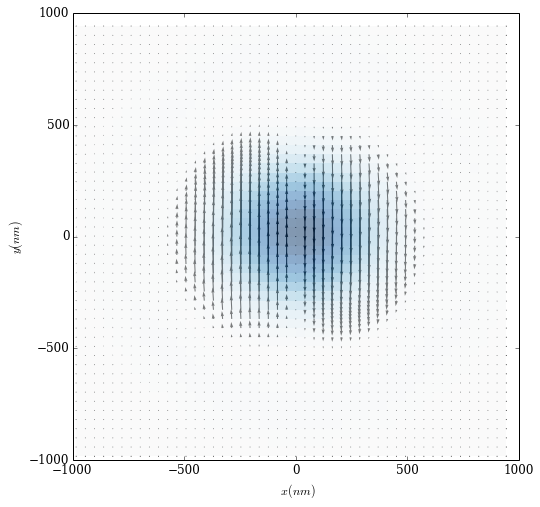

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane
alpha = 0.55                   # NA
A = 1
lamb = 515.1                   # In units of nm
k = 2 * pi / lamb  

X, Y = divide(meshgrid(arange(-12, 12, 0.5), arange(-12, 12, 0.5)), k)
r, theta = z2polar(X, Y)

U = empty_like(X)
V = empty_like(X)
M = empty_like(X)
Scale = empty_like(X)

for i, Xx in enumerate(X):
    for j, _x in enumerate(Xx):
        temp = Ellip_norm(0, k * r[i][j] * sin(alpha), theta[i][j], alpha, A)
        E_temp = E(0, k * r[i][j] * sin(alpha), theta[i][j], alpha, A)
        #U[i][j] = temp[0] 
        #V[i][j] = temp[1]
        #M[i][j] = temp[2]
        U[i][j] = temp[0] * E_temp ** 2
        V[i][j] = temp[1] * E_temp ** 2
        M[i][j] = temp[2] * E_temp ** 2
        Scale[i][j] = E_temp ** 2

#print(U)
#print(V)
#print(M)
z_min, z_max = -abs(Scale).max(), abs(Scale).max()

figure = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.quiver(X, Y, U, V)
C = ax1.pcolor(X, Y, Scale, alpha = 0.5, cmap='RdBu', vmin=z_min, vmax=z_max)
plt.xlabel(' $x (nm)$')
plt.ylabel('$y (nm)$')
#plt.colorbar(C)
#plt.savefig('Polarization.svg')

/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


[[ 0.01626132  0.01722513  0.01776285 ...,  0.01785211  0.01776285
   0.01722513]
 [ 0.01713771  0.01766314  0.01770686 ...,  0.0172657   0.01770686
   0.01766314]
 [ 0.01754169  0.01758137  0.01710373 ...,  0.01613152  0.01710373
   0.01758137]
 ..., 
 [ 0.01747875  0.01701197  0.01602104 ...,  0.01456865  0.01602104
   0.01701197]
 [ 0.01754169  0.01758137  0.01710373 ...,  0.01613152  0.01710373
   0.01758137]
 [ 0.01713771  0.01766314  0.01770686 ...,  0.0172657   0.01770686
   0.01766314]]
[[ 0.01596189  0.01708504  0.01770064 ...,  0.01779208  0.01770064
   0.01708504]
 [ 0.01698774  0.01760058  0.01764099 ...,  0.01710733  0.01764099
   0.01760058]
 [ 0.01747575  0.01751424  0.01692665 ...,  0.01572876  0.01692665
   0.01751424]
 ..., 
 [ 0.01741595  0.01683245  0.015583   ...,  0.01370304  0.015583
   0.01683245]
 [ 0.01747575  0.01751424  0.01692665 ...,  0.01572876  0.01692665
   0.01751424]
 [ 0.01698774  0.01760058  0.01764099 ...,  0.01710733  0.01764099
   0.01760058]]


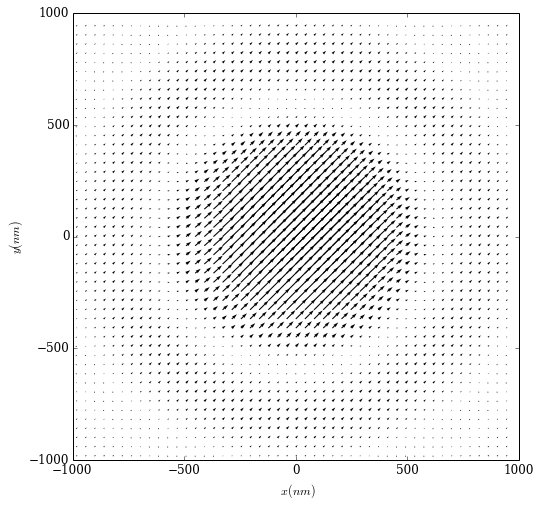

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane
alpha = 0.55                   # NA
A = 1
lamb = 515.1                   # In units of nm
k = 2 * pi / lamb  

X, Y = divide(meshgrid(arange(-12, 12, 0.5), arange(-12, 12, 0.5)), k)
r, theta = z2polar(X, Y)

U = empty_like(X)
V = empty_like(X)

for i, Xx in enumerate(X):
    for j, _x in enumerate(Xx):
        E_temp = E(0, k * r[i][j] * sin(alpha), theta[i][j], alpha, A)
        Ex_temp = sqrt(Ex(0, k * r[i][j] * sin(alpha), theta[i][j], alpha, A) * conjugate(Ex(0, k * r[i][j] * sin(alpha), theta[i][j], alpha, A)))
        #U[i][j] = temp[0] 
        #V[i][j] = temp[1]
        #M[i][j] = temp[2]
        U[i][j] = E_temp 
        V[i][j] = Ex_temp

print(U)
print(V)
#print(M)
#z_min, z_max = -abs(Scale).max(), abs(Scale).max()

figure = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.quiver(X, Y, U, V)
#C = ax1.pcolor(X, Y, Scale, alpha = 0.5, cmap='RdBu', vmin=z_min, vmax=z_max)
plt.xlabel(' $x (nm)$')
plt.ylabel('$y (nm)$')
#plt.colorbar(C)
#plt.savefig('Electric field.svg')

/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


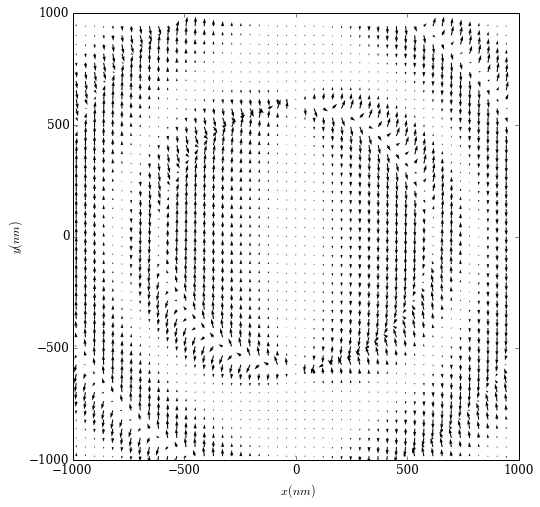

In [9]:
# Ellipticity and polarization calculation
# Checked with Wolf59

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane
alpha = 0.55                   # NA
A = 1
lamb = 515.1                   # In units of nm
k = 2 * pi / lamb  

X, Y = divide(meshgrid(arange(-12, 12, 0.5), arange(-12, 12, 0.5)), k)
r, theta = z2polar(X, Y)

U = empty_like(X)
V = empty_like(X)
M = empty_like(X)
Scale = empty_like(X)

for i, Xx in enumerate(X):
    for j, _x in enumerate(Xx):
        temp = Ellip_norm(0, k * r[i][j] * sin(alpha), theta[i][j], alpha, A)
        E_temp = E(0, k * r[i][j] * sin(alpha), theta[i][j], alpha, A)
        #U[i][j] = temp[0] 
        #V[i][j] = temp[1]
        #M[i][j] = temp[2]
        U[i][j] = temp[0]
        V[i][j] = temp[1]
        M[i][j] = temp[2]
        Scale[i][j] = E_temp ** 2

#print(U)
#print(V)
#print(M)
z_min, z_max = -abs(Scale).max(), abs(Scale).max()

figure = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.quiver(X, Y, U, V)
plt.xlabel(' $x (nm)$')
plt.ylabel('$y (nm)$')
#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)
#plt.savefig('Ellipticity.svg')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


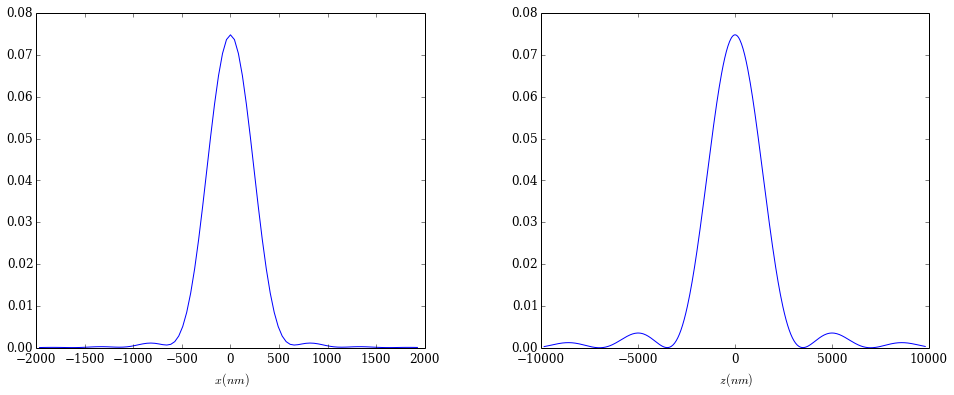

In [7]:
# Beam profile

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane
alpha = 0.55                   # NA
A = 1
lamb = 515.1                   # In units of nm
k = 2 * pi / lamb  


X = divide(arange(-24, 24, 0.5), k)
Scale = empty_like(X)

Z = divide(arange(-120, 120, 0.5), k)
Scale2 = empty_like(Z)

for i, _x in enumerate(X):
    E_temp = E(0,k * _x * sin(alpha), 0, alpha, A)
    Scale[i] = E_temp ** 2
    
for i, _z in enumerate(Z):
    E_temp = E(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    Scale2[i] = E_temp ** 2


figure = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(X, Scale)
ax1.set_xlabel(' $x (nm)$')

ax2 = plt.subplot(gs[0,1]) 
ax2.plot(Z, Scale2)
ax2.set_xlabel(' $z (nm)$')
#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)

# Light shift calculation

Above we define the polarization of the incoming light to the along the $x$ direction and propogates along the $z$ direction. In the following light-shift calculation, we define the quantization along the $x$ direction. Then the total light shift is given by

## Note: this is only true when we define the quantization axis by a bias B-field

$\Delta E(J, m_J, \omega) = -\alpha^{(0)}(J, \omega) \mid E_0^{(+)} \mid^2 -\alpha^{(1)}(J, \omega)(i \textbf{E}_0^{(-)} \times \textbf{E}_0^{(+)})_z \frac{m_J}{J} - \alpha^{(2)}(J, \omega) \frac{3 \mid E_{0z}^{(+)} \mid^2 - \mid E_0^{(+)} \mid^2}{2} \frac{3 m_J^2 - J(J+1)}{J(2J-1)}$

where $\textbf{E}(\textbf{r}) = \hat{\varepsilon} E_0^{(+)} (\textbf{r}) e^{-i \omega t} + c.c.$

From the previous calculation, we know the polarizabilities for $^1S_0$ and $^3P_1$ are

$\alpha_{^1S_0}^{(s)} = 942.543258386$

$\alpha_{^3P_1}^{(s)} = 739.595588319$

$\alpha_{^3P_1}^{(v)} = 44.4213982605135$

$\alpha_{^3P_1}^{(t)} = -101.917990775284$

They are all in atomic units.


In [11]:
alpha1_s = 942.543258386
alpha2_s = 739.595588319
alpha2_v = 44.4213982605135
alpha2_t = -101.917990775284

/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


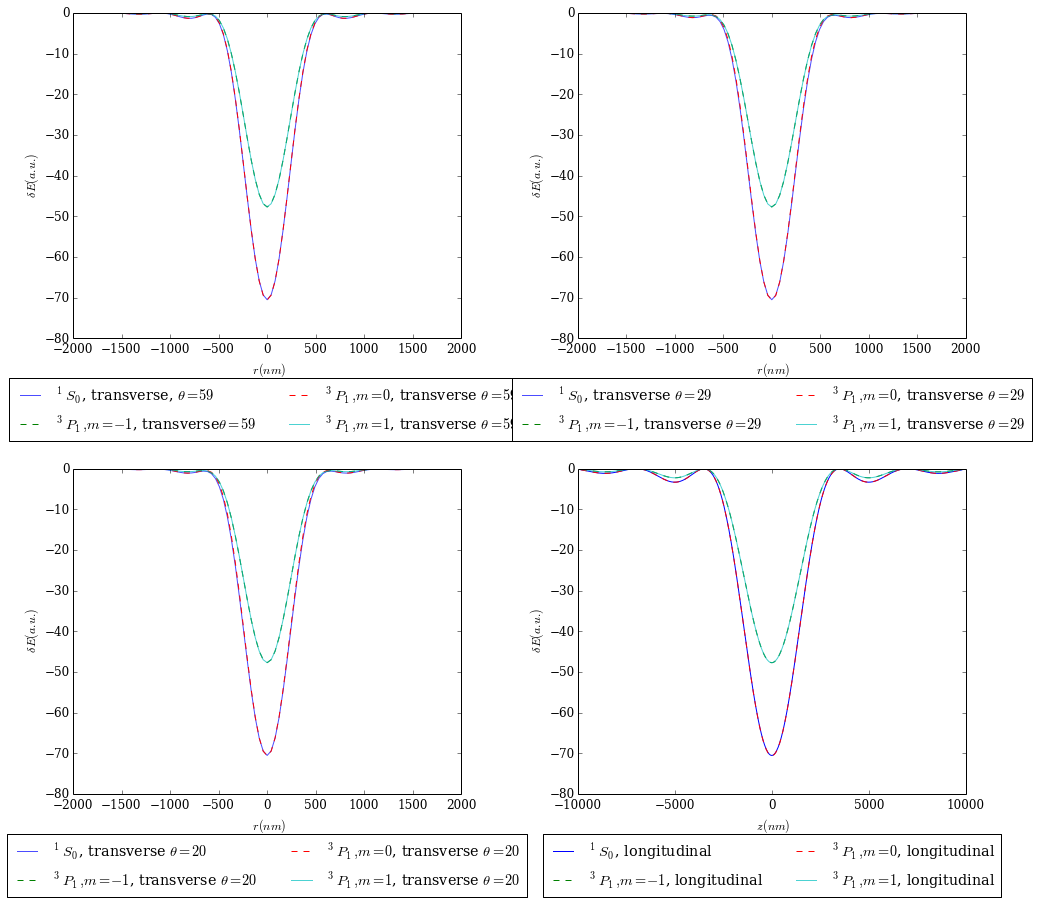

In [12]:
# Beam profile

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane
alpha = 0.55                   # NA
A = 1
lamb = 515.1                   # In units of nm
k = 2 * pi / lamb              
#r = arange(0, 2, 0.01)
#theta = 2 * np.pi * r

theta1 = pi / 3
theta2 = pi / 6
theta3 = pi / 9

R = divide(arange(-24, 24, 0.5), k)
LS_1S0_1 = empty_like(R)
LS_3P1m_1 = empty_like(R)
LS_3P10_1 = empty_like(R)
LS_3P1p_1 = empty_like(R)

LS_1S0_2 = empty_like(R)
LS_3P1m_2 = empty_like(R)
LS_3P10_2 = empty_like(R)
LS_3P1p_2 = empty_like(R)

LS_1S0_3 = empty_like(R)
LS_3P1m_3 = empty_like(R)
LS_3P10_3 = empty_like(R)
LS_3P1p_3 = empty_like(R)

Z = divide(arange(-120, 120, 0.5), k)
LS_1S0_z = empty_like(Z)
LS_3P1m_z = empty_like(Z)
LS_3P10_z = empty_like(Z)
LS_3P1p_z = empty_like(Z)


for i, _r in enumerate(R):
    E_temp = E(0,k * _r * sin(alpha), theta1, alpha, A)
    Ex_temp = sqrt(Ex(0,k * _r * sin(alpha), theta1, alpha, A) * conjugate(Ex(0,k * _r * sin(alpha), theta1, alpha, A)))
    Ellipx_temp = Ellip(0,k * _r * sin(alpha), theta1, alpha, A)[0]
    LS_1S0_1[i] = -1 * E_temp ** 2 * alpha1_s
    LS_3P1m_1[i] = -1 * E_temp ** 2 * alpha2_s + Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P10_1[i] = -1 * E_temp ** 2 * alpha2_s + (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P1p_1[i] = -1 * E_temp ** 2 * alpha2_s - Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t

    E_temp = E(0,k * _r * sin(alpha), theta2, alpha, A)
    Ex_temp = sqrt(Ex(0,k * _r * sin(alpha), theta2, alpha, A) * conjugate(Ex(0,k * _r * sin(alpha), theta2, alpha, A)))
    Ellipx_temp = Ellip(0,k * _r * sin(alpha), theta2, alpha, A)[0]
    
    LS_1S0_2[i] = -1 * E_temp ** 2 * alpha1_s
    LS_3P1m_2[i] = -1 * E_temp ** 2 * alpha2_s + Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P10_2[i] = -1 * E_temp ** 2 * alpha2_s + (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P1p_2[i] = -1 * E_temp ** 2 * alpha2_s - Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t

    E_temp = E(0,k * _r * sin(alpha), theta3, alpha, A)
    Ex_temp = sqrt(Ex(0,k * _r * sin(alpha), theta3, alpha, A) * conjugate(Ex(0,k * _r * sin(alpha), theta3, alpha, A)))
    Ellipx_temp = Ellip(0,k * _r * sin(alpha), theta3, alpha, A)[0]
    
    LS_1S0_3[i] = -1 * E_temp ** 2 * alpha1_s
    LS_3P1m_3[i] = -1 * E_temp ** 2 * alpha2_s + Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P10_3[i] = -1 * E_temp ** 2 * alpha2_s + (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P1p_3[i] = -1 * E_temp ** 2 * alpha2_s - Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t



for i, _z in enumerate(Z):
    E_temp = E(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    Ex_temp = sqrt(Ex(k * _z * sin(alpha) ** 2, 0, 0,alpha, A) * conjugate(Ex(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)))
    Ellipx_temp = Ellip(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)[0]
    LS_1S0_z[i] = -1 * E_temp ** 2 * alpha1_s
    LS_3P1m_z[i] = -1 * E_temp ** 2 * alpha2_s + Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P10_z[i] = -1 * E_temp ** 2 * alpha2_s + (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P1p_z[i] = -1 * E_temp ** 2 * alpha2_s - Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t


figure = plt.figure(figsize=(16, 14))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(R, LS_1S0_1, alpha = 0.7, label = r'$^1S_0$, transverse, $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse$\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P10_1, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.set_xlabel(' $r (nm)$')
ax1.set_ylabel(' $\delta E (a.u.)$')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)

ax2 = plt.subplot(gs[0,1])
ax2.plot(R, LS_1S0_2, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P1m_2, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P10_2, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P1p_2, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.set_xlabel(' $r (nm)$')
ax2.set_ylabel(' $\delta E (a.u.)$')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)

ax3 = plt.subplot(gs[1,0])
ax3.plot(R, LS_1S0_3, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P1m_3, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P10_3, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P1p_3, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.set_xlabel(' $r (nm)$')
ax3.set_ylabel(' $\delta E (a.u.)$')
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)


ax4 = plt.subplot(gs[1,1]) 
ax4.plot(Z, LS_1S0_z, label = r'$^1S_0$, longitudinal')
ax4.plot(Z, LS_3P1m_z, linestyle = '--',  label = r'$^3P_1, m = -1$, longitudinal')
ax4.plot(Z, LS_3P10_z, linestyle = '--', label = r'$^3P_1, m = 0$, longitudinal')
ax4.plot(Z, LS_3P1p_z, alpha = 0.7, label = r'$^3P_1, m = 1$, longitudinal')
ax4.set_xlabel(' $z (nm)$')
ax4.set_ylabel(' $\delta E (a.u.)$')
ax4.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)


#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)

/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


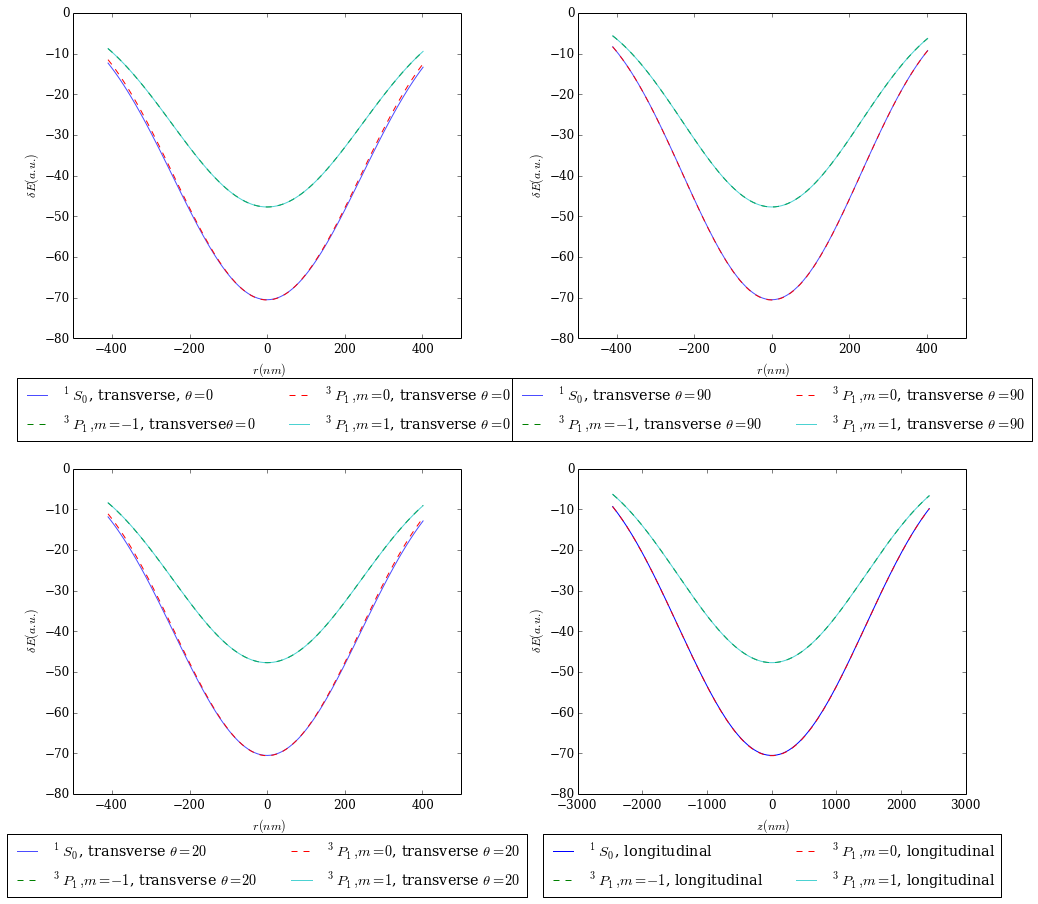

In [13]:
# Beam profile

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane
alpha = 0.55                   # NA
A = 1
lamb = 515.1                   # In units of nm
k = 2 * pi / lamb              
#r = arange(0, 2, 0.01)
#theta = 2 * np.pi * r

theta1 = 0
theta2 = pi / 2
theta3 = pi / 9

R = divide(arange(-5, 5, 0.1), k)
LS_1S0_1 = empty_like(R)
LS_3P1m_1 = empty_like(R)
LS_3P10_1 = empty_like(R)
LS_3P1p_1 = empty_like(R)

LS_1S0_2 = empty_like(R)
LS_3P1m_2 = empty_like(R)
LS_3P10_2 = empty_like(R)
LS_3P1p_2 = empty_like(R)

LS_1S0_3 = empty_like(R)
LS_3P1m_3 = empty_like(R)
LS_3P10_3 = empty_like(R)
LS_3P1p_3 = empty_like(R)

Z = divide(arange(-30, 30, 0.3), k)
LS_1S0_z = empty_like(Z)
LS_3P1m_z = empty_like(Z)
LS_3P10_z = empty_like(Z)
LS_3P1p_z = empty_like(Z)


for i, _r in enumerate(R):
    E_temp = E(0,k * _r * sin(alpha), theta1, alpha, A)
    Ex_temp = sqrt(Ex(0,k * _r * sin(alpha), theta1, alpha, A) * conjugate(Ex(0,k * _r * sin(alpha), theta1, alpha, A)))
    Ellipx_temp = Ellip(0,k * _r * sin(alpha), theta1, alpha, A)[0]
    LS_1S0_1[i] = -1 * E_temp ** 2 * alpha1_s
    LS_3P1m_1[i] = -1 * E_temp ** 2 * alpha2_s + Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P10_1[i] = -1 * E_temp ** 2 * alpha2_s + (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P1p_1[i] = -1 * E_temp ** 2 * alpha2_s - Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t

    E_temp = E(0,k * _r * sin(alpha), theta2, alpha, A)
    Ex_temp = sqrt(Ex(0,k * _r * sin(alpha), theta2, alpha, A) * conjugate(Ex(0,k * _r * sin(alpha), theta2, alpha, A)))
    Ellipx_temp = Ellip(0,k * _r * sin(alpha), theta2, alpha, A)[0]
    
    LS_1S0_2[i] = -1 * E_temp ** 2 * alpha1_s
    LS_3P1m_2[i] = -1 * E_temp ** 2 * alpha2_s + Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P10_2[i] = -1 * E_temp ** 2 * alpha2_s + (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P1p_2[i] = -1 * E_temp ** 2 * alpha2_s - Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t

    E_temp = E(0,k * _r * sin(alpha), theta3, alpha, A)
    Ex_temp = sqrt(Ex(0,k * _r * sin(alpha), theta3, alpha, A) * conjugate(Ex(0,k * _r * sin(alpha), theta3, alpha, A)))
    Ellipx_temp = Ellip(0,k * _r * sin(alpha), theta3, alpha, A)[0]
    
    LS_1S0_3[i] = -1 * E_temp ** 2 * alpha1_s
    LS_3P1m_3[i] = -1 * E_temp ** 2 * alpha2_s + Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P10_3[i] = -1 * E_temp ** 2 * alpha2_s + (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P1p_3[i] = -1 * E_temp ** 2 * alpha2_s - Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t



for i, _z in enumerate(Z):
    E_temp = E(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    Ex_temp = sqrt(Ex(k * _z * sin(alpha) ** 2, 0, 0,alpha, A) * conjugate(Ex(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)))
    Ellipx_temp = Ellip(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)[0]
    LS_1S0_z[i] = -1 * E_temp ** 2 * alpha1_s
    LS_3P1m_z[i] = -1 * E_temp ** 2 * alpha2_s + Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P10_z[i] = -1 * E_temp ** 2 * alpha2_s + (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t
    LS_3P1p_z[i] = -1 * E_temp ** 2 * alpha2_s - Ellipx_temp * alpha2_v - 0.5 * (3 * Ex_temp ** 2 - E_temp ** 2) * alpha2_t


figure = plt.figure(figsize=(16, 14))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(R, LS_1S0_1, alpha = 0.7, label = r'$^1S_0$, transverse, $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse$\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P10_1, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.set_xlabel(' $r (nm)$')
ax1.set_ylabel(' $\delta E (a.u.)$')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)

ax2 = plt.subplot(gs[0,1])
ax2.plot(R, LS_1S0_2, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P1m_2, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P10_2, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P1p_2, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.set_xlabel(' $r (nm)$')
ax2.set_ylabel(' $\delta E (a.u.)$')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)

ax3 = plt.subplot(gs[1,0])
ax3.plot(R, LS_1S0_3, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P1m_3, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P10_3, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P1p_3, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.set_xlabel(' $r (nm)$')
ax3.set_ylabel(' $\delta E (a.u.)$')
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)


ax4 = plt.subplot(gs[1,1]) 
ax4.plot(Z, LS_1S0_z, label = r'$^1S_0$, longitudinal')
ax4.plot(Z, LS_3P1m_z, linestyle = '--',  label = r'$^3P_1, m = -1$, longitudinal')
ax4.plot(Z, LS_3P10_z, linestyle = '--', label = r'$^3P_1, m = 0$, longitudinal')
ax4.plot(Z, LS_3P1p_z, alpha = 0.7, label = r'$^3P_1, m = 1$, longitudinal')
ax4.set_xlabel(' $z (nm)$')
ax4.set_ylabel(' $\delta E (a.u.)$')
ax4.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)


#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)

The trap depth for $^1S_0$ is simply $\Delta E = -\alpha_{^1S_0}^{(s)} \mid E_0^{(+)} \mid^2$. The vector light shift for $^3P_1$ is $ - \alpha_{^3P_1}^{(v)} (i \textbf{E}_0^{(-)} \times \textbf{E}_0^{(+)})_z \frac{m_J}{J}$. Then

$B^{fict} = \frac{\alpha_{^3P_1}^{(v)}\Delta E}{g \mu_B\alpha_{^1S_0}^{(s)}}(i {\bf \varepsilon_0^{(-)}} \times { \bf \varepsilon_0^{(+)}})_z = 0.022442520916167753 (Gauss / MHz)$

$|B^{fict}_{max}| = 0.449 Gauss $ for a $20 MHz$ trap, $269.3 Gauss $ for a $20 MHz$ trap

Or we say vector light shift is at most 4.7% of the trap depth


## The effects of external magnetic field

Follow Steck pp 370-371, the Stark operator can be written as

$V^{EE} (J,\omega)= -\alpha^{(0)}(J, \omega) \mid E_0^{(+)} \mid^2 -\alpha^{(1)}(J, \omega)(i \textbf{E}_0^{(-)} \times \textbf{E}_0^{(+)})_z \frac{J_z}{J} - \alpha^{(2)}(J, \omega) \frac{3 \mid E_{0z}^{(+)} \mid^2 - \mid E_0^{(+)} \mid^2}{2} \frac{3 J_z^2 - J^2}{J(2J-1)}$

For $^3P_1$ this is 

$V^{EE} (J = 1,\omega)= -\alpha^{(0)}(J, \omega) \mid E_0^{(+)} \mid^2 -\alpha^{(1)}(J, \omega)(i \textbf{E}_0^{(-)} \times \textbf{E}_0^{(+)})_z J_z- \alpha^{(2)}(J, \omega) \frac{3 \mid E_{0z}^{(+)} \mid^2 - \mid E_0^{(+)} \mid^2}{2} (3 J_z^2 - J^2)$

Now our B-field is the same direction as E-field (along x), and we get the Hamiltonian:

$H_Z = g \mu_B J_zB$

where for $^3P_1$, $g = \frac{3}{2} + \frac{S(S+1) - L(L+1)}{2J(J+1)} = \frac{3}{2}$, $g \mu_B = 2.1 MHz/Gauss$ to a good approximation. 

# Several constants

In [5]:
from __future__ import division, print_function, unicode_literals

# Basic constants
pi = 3.1415926
c = 299792458
h = 6.62606957e-34
hbar = h / 2 / pi
k_B = 1.3806488e-23
m_e = 9.10938291e-31
m_p = 1.672621898e-27
mu_0 = 4e-7 * pi
epsilon_0 = 1 / c**2 / mu_0
E = 1.602176565e-19
N_A = 6.02214129e+23
a_0 = 5.2917721067E-11


# Mass of Sr-88, Sr-87, Sr-86, Sr-84
M88 = 1.459706905272492E-25  
M87 = 1.4431557366419E-25  
M86 = 1.42655671117996E-25
M84 = 1.3934150821E-25
M = M88

In [357]:
from sympy import S
from sympy.physics.wigner import racah
from sympy.physics.wigner import wigner_3j
from sympy.physics.wigner import wigner_6j

# 3P1: J = 1
from math import sqrt
from numpy import zeros, conj, amax, multiply, divide, cos, pi
from scipy import linalg as LA

alpha1_s = 942.543258386 / (3 / 4 * (c / a_0)**3) * 3 * pi * epsilon_0 * c**3
#alpha2_s = 739.595588319 / (3 / 4 * (c / a_0)**3) * 3 * pi * epsilon_0 * c**3
#alpha2_v = 44.4213982605135 / (3 / 4 * (c / a_0)**3) * 3 * pi * epsilon_0 * c**3
#alpha2_t = -101.917990775284 / (3 / 4 * (c / a_0)**3) * 3 * pi * epsilon_0 * c**3

# Atomic units
alpha1_s = 942.543258386
alpha2_s = 739.595588319
alpha2_v = 44.4213982605135
alpha2_t = -101.917990775284



# E-field tensor
# Ex, Ey, Ez must be normalized
def Conv_spherical_tensor((_Ex, _Ey, _Ez)):
    E = sqrt(abs(_Ex) ** 2 + abs(_Ey) ** 2 + abs(_Ez) ** 2)
    Ex = _Ex / E
    Ey = _Ey / E
    Ez = _Ez / E
    E_1 = (Ex - 1j * Ey) / sqrt(2)
    E0 = Ez
    E1 = -(Ex + 1j * Ey) / sqrt(2)
    #print(E_1, E0, E1)
    tensor = zeros((3, 5), dtype = 'complex128')
    tensor[0][0] = -1 / sqrt(3)
    tensor[1][0] = ((abs(E1)) ** 2 - (abs(E_1)) ** 2) / sqrt(2)
    tensor[1][1] = -1 * (E0 * conj(E_1) + conj(E0) * E1) / sqrt(2)
    tensor[1][-1] = (E0 * conj(E1) + conj(E0) * E_1) / sqrt(2)
    tensor[2][0] = (3 * (abs(E0)) ** 2 - 1) / sqrt(6)
    tensor[2][1] = -1 * (E0 * conj(E_1) - conj(E0) * E1) / sqrt(2)
    tensor[2][-1] = -1 * (E0 * conj(E1) - conj(E0) * E_1) / sqrt(2)
    tensor[2][2] = -1 * E1 * conj(E_1)
    tensor[2][-2] = -1 * (E_1 * conj(E1))
    #print(tensor[1][0])
    H = zeros((3, 3), dtype = 'complex128')
    J = 1
    for K in [0, 1, 2]:
        for q in range(-K, K + 1, 1):
            for m in [-1, 0, 1]:
                for _m in [-1, 0, 1]:
                    if K == 0:
                        #print(float(wigner_3j(J, K, J, -m, -q, _m)))
                        H[m + 1][_m + 1] = H[m + 1][_m + 1] + E ** 2 * alpha2_s * tensor[K][q] * wigner_3j(J, K, J, -m, -q, _m) * sqrt(3 * (2 * J + 1)) * (-1)**(J - m) * (-1) ** (K + q)
                    if K == 1:
                        H[m + 1][_m + 1] = H[m + 1][_m + 1] + E ** 2 * alpha2_v * tensor[K][q] * wigner_3j(J, K, J, -m, -q, _m) * sqrt(2 * (J + 1) * (2 * J + 1) / J) * (-1)**(J - m) * (-1) ** (K + q)
                    if K == 2:
                        H[m + 1][_m + 1] = H[m + 1][_m + 1] + E ** 2 * alpha2_t * tensor[K][q] * wigner_3j(J, K, J, -m, -q, _m) * (-1) * sqrt(3 * (J + 1) * (2 * J + 1) * (2 * J + 3) / (2 * J * (2 * J - 1))) * (-1)**(J - m) * (-1) ** (K + q)
    val1 = -alpha1_s * E ** 2
    #print(val1)
    #print(H)
    e_vals, e_vecs = LA.eig(H)
    #print(e_vals)
    #print(e_vecs)
    purity = amax(abs(e_vecs) ** 2, axis = 0)
    #return(val1, e_vals , purity)   # In atomic units
    factor = 4.35974417e-18 / (1e6 * 2 * pi * hbar)        # Atomic units 
    #factor = 1 / (1e6 * 2 * pi * hbar) 
    return (val1 * factor, multiply(e_vals, factor), purity)        # In MHz

# With B-field, s is the direction of the B field, along z or -z, cali is the calibration factor
# s = 1 
# Choose SI based atomic units, mu_B = 1 / 2, 1 au = 2.35 * 10 ^ 9 Gauss
def Conv_spherical_tensor_B((_Ex, _Ey, _Ez), Bz, s):
    E = sqrt(abs(_Ex) ** 2 + abs(_Ey) ** 2 + abs(_Ez) ** 2)
    Ex = _Ex / E
    Ey = _Ey / E
    Ez = _Ez / E
    E_1 = (Ex - 1j * Ey) / sqrt(2)
    E0 = Ez
    E1 = -(Ex + 1j * Ey) / sqrt(2)
    #print(E_1, E0, E1)
    tensor = zeros((3, 5), dtype = 'complex128')
    tensor[0][0] = -1 / sqrt(3)
    tensor[1][0] = ((abs(E1)) ** 2 - (abs(E_1)) ** 2) / sqrt(2)
    tensor[1][1] = -1 * (E0 * conj(E_1) + conj(E0) * E1) / sqrt(2)
    tensor[1][-1] = (E0 * conj(E1) + conj(E0) * E_1) / sqrt(2)
    tensor[2][0] = (3 * (abs(E0)) ** 2 - 1) / sqrt(6)
    tensor[2][1] = -1 * (E0 * conj(E_1) - conj(E0) * E1) / sqrt(2)
    tensor[2][-1] = -1 * (E0 * conj(E1) - conj(E0) * E_1) / sqrt(2)
    tensor[2][2] = -1 * E1 * conj(E_1)
    tensor[2][-2] = -1 * (E_1 * conj(E1))
    #print(tensor[1][0])
    H = zeros((3, 3), dtype = 'complex128')
    J = 1
    for K in [0, 1, 2]:
        for q in range(-K, K + 1, 1):
            for m in [-1, 0, 1]:
                for _m in [-1, 0, 1]:
                    if K == 0:
                        #print(float(wigner_3j(J, K, J, -m, -q, _m)))
                        H[m + 1][_m + 1] = H[m + 1][_m + 1] + E ** 2 * alpha2_s * tensor[K][q] * wigner_3j(J, K, J, -m, -q, _m) * sqrt(3 * (2 * J + 1)) * (-1)**(J - m) * (-1) ** (K + q)
                        if m == _m:
                            H[m + 1][_m + 1] = H[m + 1][_m + 1] + s * Bz / (2.35e9) * 0.5 * 1.5 * m
                    if K == 1:
                        H[m + 1][_m + 1] = H[m + 1][_m + 1] + E ** 2 * alpha2_v * tensor[K][q] * wigner_3j(J, K, J, -m, -q, _m) * sqrt(2 * (J + 1) * (2 * J + 1) / J) * (-1)**(J - m) * (-1) ** (K + q)
                    if K == 2:
                        H[m + 1][_m + 1] = H[m + 1][_m + 1] + E ** 2 * alpha2_t * tensor[K][q] * wigner_3j(J, K, J, -m, -q, _m) * (-1) * sqrt(3 * (J + 1) * (2 * J + 1) * (2 * J + 3) / (2 * J * (2 * J - 1))) * (-1)**(J - m) * (-1) ** (K + q)
    val1 = -alpha1_s * E ** 2
    #print(val1)
    #print(H)
    e_vals, e_vecs = LA.eig(H)
    #print(e_vals)
    #print(e_vecs)
    purity = amax(abs(e_vecs) ** 2, axis = 0)
    #return(val1, e_vals , purity)   # In atomic units
    factor = 4.35974417e-18 / (1e6 * 2 * pi * hbar)        # Atomic units 
    #factor = 1 / (1e6 * 2 * pi * hbar) 
    return (val1 * factor, multiply(e_vals, factor), purity)        # In MHz




pi1 = (0, 0, 2)
pi2 = (1, 0, 0)
sigm = (1 / sqrt(2), 1j / sqrt(2), 0)
sigp = (-1 / sqrt(2), 1j / sqrt(2), 0)
#t = Conv_spherical_tensor(pi1)

# At the focal plane                     
lamb = 515.1                        # In units of nm
k = 2 * pi / lamb 
Ptot = 2                            # In uints of mW
w0 = 500                            # In units of nm 
#alpha = lamb / (pi * w0) / 2 
alpha = 0.50
# Peak intensity at the focus
Itot = 2 * Ptot / pi / w0**2        # In units of mW/nm^2

############################# Gaussian optics don't work ##############################
# Peak E field at the focus
# Ein  = sqrt(2 * Itot * 1e-3 / 1e-6 / (c * epsilon_0)) / 5.14220652e11  # Atomic units
# print(-1 / 4 * alpha1_s * (Ein)**2 * 4.35974417e-18 / (1e6 * 2 * pi * hbar))
# A = pi * f * 1e-3 * Ein / (lamb * 1e-9)
#######################################################################################

A = sqrt(15 * Itot * 1e-3 / 1e-18 /((1 - 5 / 8 * cos(alpha)**(3/2) * (1 + 3 / 5 * cos(alpha))) * 8 * epsilon_0 * c)) / 5.14220652e11
temp = (Ey(0, 0, 0, alpha, A),  Ez(0, 0, 0, alpha, A),  Ex(0,0, 0, alpha, A))
print(temp)
print(Conv_spherical_tensor(temp))
print(Conv_spherical_tensor_B(temp, 10, 1))
# Sould be 2.1 MHz / Gauss

(0j, (-0+0j), -1.8269694090692508e-06j)
(-20.699928688822517, array([-14.00453579+0.j, -20.71943759+0.j, -14.00453579+0.j]), array([ 1.,  1.,  1.]))
(-20.699928688822517, array([-35.00352585+0.j, -20.71943759+0.j,   6.99445427+0.j]), array([ 1.,  1.,  1.]))


$w = \frac{\lambda}{\pi w_0} f$

$E_{in} = \sqrt{\frac{2 I_{tot}}{c \epsilon_0}}$

$I_{tot} = \frac{2P}{\pi w^2}$

$A = \frac{\pi f E_{in}}{\lambda} = \frac{2\pi f}{w\lambda}  \sqrt{\frac{P}{\pi c \epsilon_0}} = \frac{2\pi^2 w_0}{\lambda^2}  \sqrt{\frac{P}{\pi c \epsilon_0}}$

$S = \frac{2 c A^2}{15 \pi}(1-\frac{5}{8}(cos^{\frac{3}{2}}\alpha)(1 + \frac{3}{5}cos\alpha))$

/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:55: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:56: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:57: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:65: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:66: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7

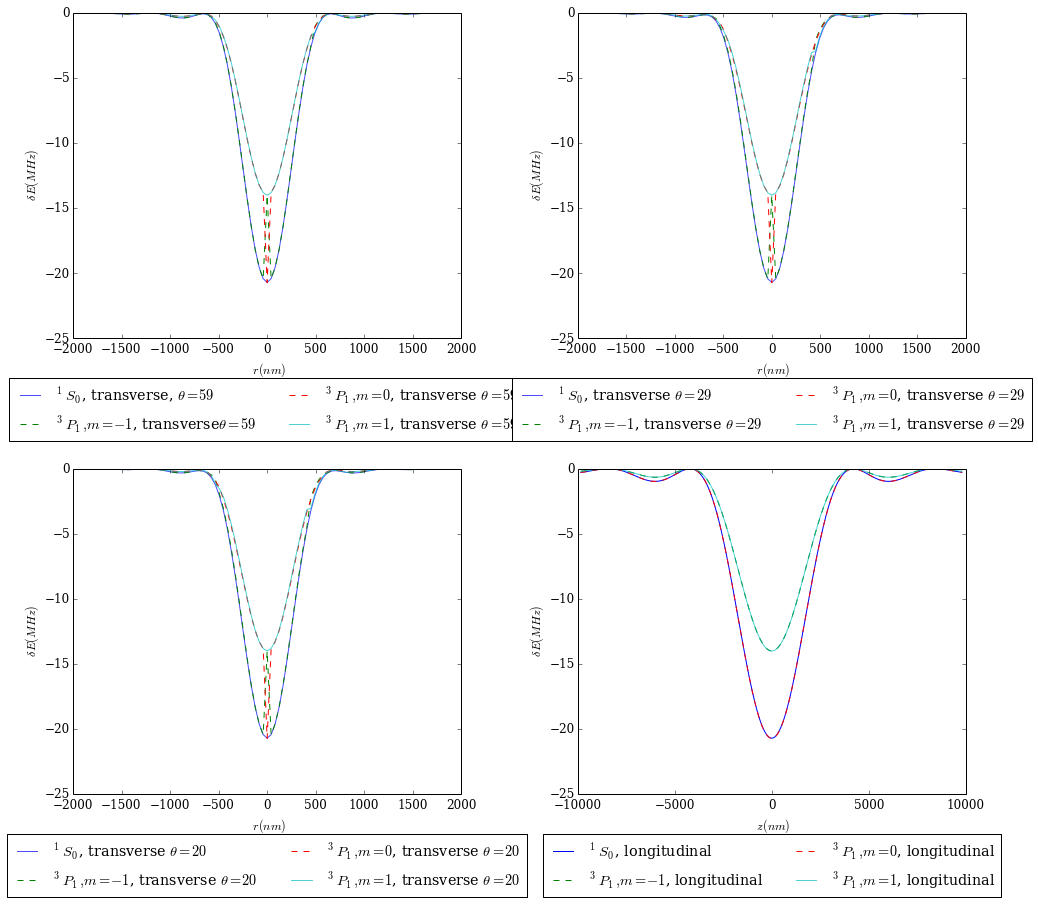

In [341]:
# Beam profile
# Gives the same result as before

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt, pi

# At the focal plane                     
lamb = 515.1                        # In units of nm
k = 2 * pi / lamb 
Ptot = 2                            # In uints of mW
w0 = 500                            # In units of nm 
#alpha = lamb / (pi * w0) / 2 
alpha = 0.50
# Peak intensity at the focus
Itot = 2 * Ptot / pi / w0**2        # In units of mW/nm^2
A = sqrt(15 * Itot * 1e-3 / 1e-18 /((1 - 5 / 8 * cos(alpha)**(3/2) * (1 + 3 / 5 * cos(alpha))) * 8 * epsilon_0 * c)) / 5.14220652e11



theta1 = pi / 3
theta2 = pi / 6
theta3 = pi / 9

R = divide(arange(-24, 24, 0.5), k)
LS_1S0_1 = empty_like(R)
LS_3P1m_1 = empty_like(R)
LS_3P10_1 = empty_like(R)
LS_3P1p_1 = empty_like(R)

LS_1S0_2 = empty_like(R)
LS_3P1m_2 = empty_like(R)
LS_3P10_2 = empty_like(R)
LS_3P1p_2 = empty_like(R)

LS_1S0_3 = empty_like(R)
LS_3P1m_3 = empty_like(R)
LS_3P10_3 = empty_like(R)
LS_3P1p_3 = empty_like(R)

Z = divide(arange(-120, 120, 0.5), k)
LS_1S0_z = empty_like(Z)
LS_3P1m_z = empty_like(Z)
LS_3P10_z = empty_like(Z)
LS_3P1p_z = empty_like(Z)


for i, _r in enumerate(R):
    Ex_temp = Ex(0,k * _r * sin(alpha), theta1, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta1, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta1, alpha, A)
    result = Conv_spherical_tensor((Ey_temp, Ez_temp, Ex_temp)) 
    LS_1S0_1[i] = result[0]
    LS_3P1m_1[i] = result[1][0]
    LS_3P10_1[i] = result[1][1]
    LS_3P1p_1[i] = result[1][2]

    Ex_temp = Ex(0,k * _r * sin(alpha), theta2, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta2, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta2, alpha, A)
    result = Conv_spherical_tensor((Ey_temp, Ez_temp, Ex_temp))
    LS_1S0_2[i] = result[0]
    LS_3P1m_2[i] = result[1][0] 
    LS_3P10_2[i] = result[1][1] 
    LS_3P1p_2[i] = result[1][2] 
    
    Ex_temp = Ex(0,k * _r * sin(alpha), theta3, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta3, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta3, alpha, A)
    result = Conv_spherical_tensor((Ey_temp, Ez_temp, Ex_temp))
    LS_1S0_3[i] = result[0] 
    LS_3P1m_3[i] = result[1][0] 
    LS_3P10_3[i] = result[1][1]
    LS_3P1p_3[i] = result[1][2] 


for i, _z in enumerate(Z):
    Ex_temp = Ex(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    Ey_temp = Ey(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    Ez_temp = Ez(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    result = Conv_spherical_tensor((Ey_temp, Ez_temp, Ex_temp))
    LS_1S0_z[i] = result[0] 
    LS_3P1m_z[i] = result[1][0]
    LS_3P10_z[i] = result[1][1]
    LS_3P1p_z[i] = result[1][2]


figure = plt.figure(figsize=(16, 14))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(R, LS_1S0_1, alpha = 0.7, label = r'$^1S_0$, transverse, $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse$\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P10_1, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.set_xlabel(' $r (nm)$')
ax1.set_ylabel(' $\delta E (MHz)$')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)

ax2 = plt.subplot(gs[0,1])
ax2.plot(R, LS_1S0_2, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P1m_2, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P10_2, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P1p_2, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.set_xlabel(' $r (nm)$')
ax2.set_ylabel(' $\delta E (MHz)$')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)

ax3 = plt.subplot(gs[1,0])
ax3.plot(R, LS_1S0_3, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P1m_3, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P10_3, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P1p_3, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.set_xlabel(' $r (nm)$')
ax3.set_ylabel(' $\delta E (MHz)$')
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)


ax4 = plt.subplot(gs[1,1]) 
ax4.plot(Z, LS_1S0_z, label = r'$^1S_0$, longitudinal')
ax4.plot(Z, LS_3P1m_z, linestyle = '--',  label = r'$^3P_1, m = -1$, longitudinal')
ax4.plot(Z, LS_3P10_z, linestyle = '--', label = r'$^3P_1, m = 0$, longitudinal')
ax4.plot(Z, LS_3P1p_z, alpha = 0.7, label = r'$^3P_1, m = 1$, longitudinal')
ax4.set_xlabel(' $z (nm)$')
ax4.set_ylabel(' $\delta E (MHz)$')
ax4.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)


#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)

/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:55: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7

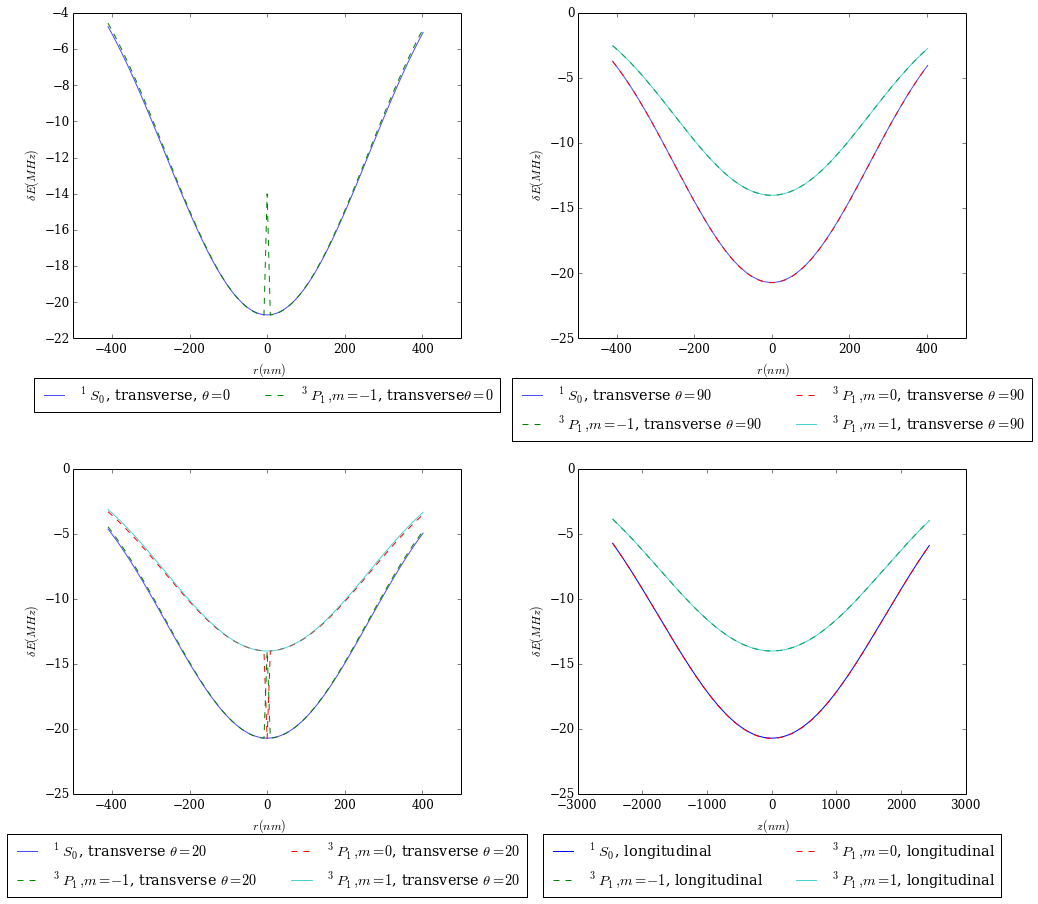

In [342]:
# Beam profile
# Gives the same result as before
# Note that the label of states are wrong

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt, pi

# At the focal plane                     
lamb = 515.1                        # In units of nm
k = 2 * pi / lamb 
Ptot = 2                            # In uints of mW
w0 = 500                            # In units of nm 
#alpha = lamb / (pi * w0) / 2 
alpha = 0.50
# Peak intensity at the focus
Itot = 2 * Ptot / pi / w0**2        # In units of mW/nm^2
A = sqrt(15 * Itot * 1e-3 / 1e-18 /((1 - 5 / 8 * cos(alpha)**(3/2) * (1 + 3 / 5 * cos(alpha))) * 8 * epsilon_0 * c)) / 5.14220652e11

theta1 = 0
theta2 = pi / 2
theta3 = pi / 9

R = divide(arange(-5, 5, 0.1), k)
LS_1S0_1 = empty_like(R)
LS_3P1m_1 = empty_like(R)
LS_3P10_1 = empty_like(R)
LS_3P1p_1 = empty_like(R)

LS_1S0_2 = empty_like(R)
LS_3P1m_2 = empty_like(R)
LS_3P10_2 = empty_like(R)
LS_3P1p_2 = empty_like(R)

LS_1S0_3 = empty_like(R)
LS_3P1m_3 = empty_like(R)
LS_3P10_3 = empty_like(R)
LS_3P1p_3 = empty_like(R)

Z = divide(arange(-30, 30, 0.3), k)
LS_1S0_z = empty_like(Z)
LS_3P1m_z = empty_like(Z)
LS_3P10_z = empty_like(Z)
LS_3P1p_z = empty_like(Z)


for i, _r in enumerate(R):
    Ex_temp = Ex(0,k * _r * sin(alpha), theta1, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta1, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta1, alpha, A)
    result = Conv_spherical_tensor((Ey_temp, Ez_temp, Ex_temp)) 
    LS_1S0_1[i] = result[0]
    LS_3P1m_1[i] = result[1][0]
    LS_3P10_1[i] = result[1][1]
    LS_3P1p_1[i] = result[1][2]

    Ex_temp = Ex(0,k * _r * sin(alpha), theta2, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta2, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta2, alpha, A)
    result = Conv_spherical_tensor((Ey_temp, Ez_temp, Ex_temp))
    LS_1S0_2[i] = result[0]
    LS_3P1m_2[i] = result[1][0] 
    LS_3P10_2[i] = result[1][1] 
    LS_3P1p_2[i] = result[1][2] 
    
    Ex_temp = Ex(0,k * _r * sin(alpha), theta3, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta3, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta3, alpha, A)
    result = Conv_spherical_tensor((Ey_temp, Ez_temp, Ex_temp))
    LS_1S0_3[i] = result[0] 
    LS_3P1m_3[i] = result[1][0] 
    LS_3P10_3[i] = result[1][1]
    LS_3P1p_3[i] = result[1][2] 


for i, _z in enumerate(Z):
    Ex_temp = Ex(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    Ey_temp = Ey(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    Ez_temp = Ez(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    result = Conv_spherical_tensor((Ey_temp, Ez_temp, Ex_temp))
    LS_1S0_z[i] = result[0] 
    LS_3P1m_z[i] = result[1][0]
    LS_3P10_z[i] = result[1][1]
    LS_3P1p_z[i] = result[1][2]


figure = plt.figure(figsize=(16, 14))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(R, LS_1S0_1, alpha = 0.7, label = r'$^1S_0$, transverse, $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse$\theta = %d $ ' % (theta1 * 180 / pi))
#ax1.plot(R, LS_3P10_1, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
#ax1.plot(R, LS_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.set_xlabel(' $r (nm)$')
ax1.set_ylabel(' $\delta E (MHz)$')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)

ax2 = plt.subplot(gs[0,1])
ax2.plot(R, LS_1S0_2, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P1m_2, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P10_2, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P1p_2, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.set_xlabel(' $r (nm)$')
ax2.set_ylabel(' $\delta E (MHz)$')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)

ax3 = plt.subplot(gs[1,0])
ax3.plot(R, LS_1S0_3, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P1m_3, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P10_3, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P1p_3, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.set_xlabel(' $r (nm)$')
ax3.set_ylabel(' $\delta E (MHz)$')
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)


ax4 = plt.subplot(gs[1,1]) 
ax4.plot(Z, LS_1S0_z, label = r'$^1S_0$, longitudinal')
ax4.plot(Z, LS_3P1m_z, linestyle = '--',  label = r'$^3P_1, m = -1$, longitudinal')
ax4.plot(Z, LS_3P10_z, linestyle = '--', label = r'$^3P_1, m = 0$, longitudinal')
ax4.plot(Z, LS_3P1p_z, alpha = 0.7, label = r'$^3P_1, m = 1$, longitudinal')
ax4.set_xlabel(' $z (nm)$')
ax4.set_ylabel(' $\delta E (MHz)$')
ax4.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)


#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)

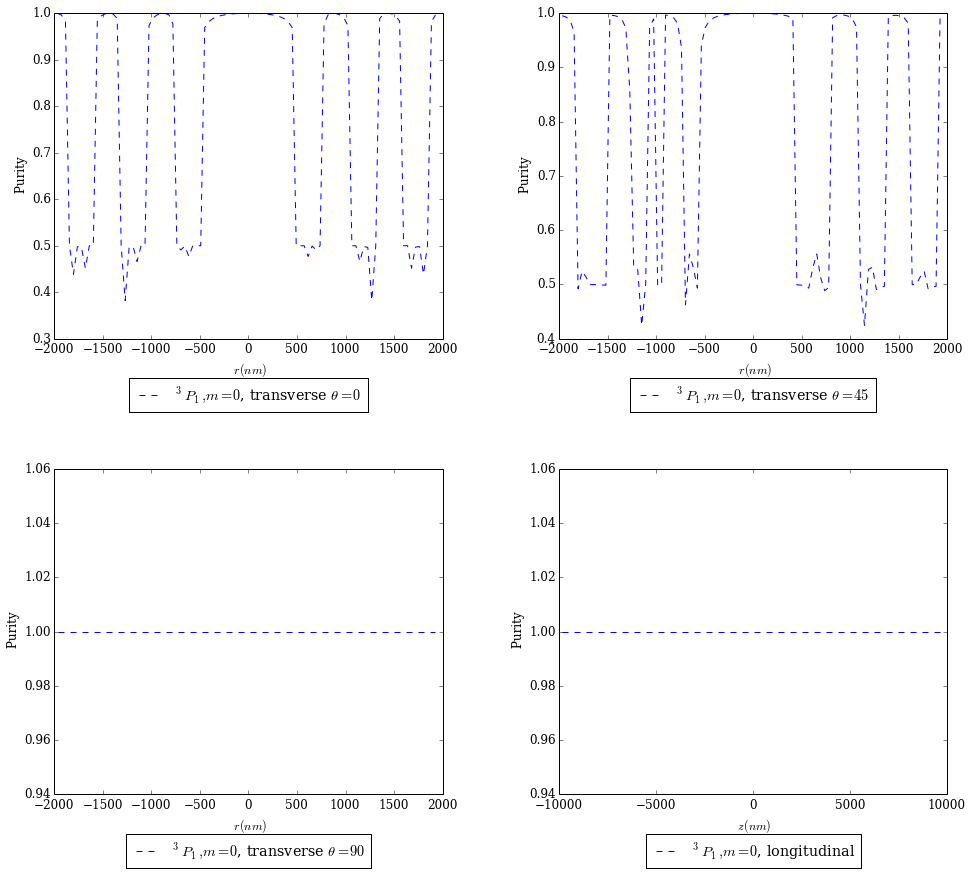

In [351]:
# Beam profile
# Gives the same result as before

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane                     
lamb = 515.1                        # In units of nm
k = 2 * pi / lamb 
Ptot = 2                            # In uints of mW
w0 = 500                            # In units of nm 
#alpha = lamb / (pi * w0) / 2 
alpha = 0.50
# Peak intensity at the focus
Itot = 2 * Ptot / pi / w0**2        # In units of mW/nm^2
A = sqrt(15 * Itot * 1e-3 / 1e-18 /((1 - 5 / 8 * cos(alpha)**(3/2) * (1 + 3 / 5 * cos(alpha))) * 8 * epsilon_0 * c)) / 5.14220652e11

theta1 = 0
theta2 = pi / 4
theta3 = pi / 2

R = divide(arange(-24, 24, 0.5), k)
P_3P1m_1 = empty_like(R)
P_3P10_1 = empty_like(R)
P_3P1p_1 = empty_like(R)

P_3P1m_2 = empty_like(R)
P_3P10_2 = empty_like(R)
P_3P1p_2 = empty_like(R)

P_3P1m_3 = empty_like(R)
P_3P10_3 = empty_like(R)
P_3P1p_3 = empty_like(R)

Z = divide(arange(-120, 120, 0.5), k)
P_3P1m_z = empty_like(Z)
P_3P10_z = empty_like(Z)
P_3P1p_z = empty_like(Z)


for i, _r in enumerate(R):
    Ex_temp = Ex(0,k * _r * sin(alpha), theta1, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta1, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta1, alpha, A)
    result = Conv_spherical_tensor((Ey_temp, Ez_temp, Ex_temp)) 
    P_3P1m_1[i] = result[2][0]
    P_3P10_1[i] = result[2][1]
    P_3P1p_1[i] = result[2][2]

    Ex_temp = Ex(0,k * _r * sin(alpha), theta2, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta2, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta2, alpha, A)
    result = Conv_spherical_tensor((Ey_temp, Ez_temp, Ex_temp))
    P_3P1m_2[i] = result[2][0]
    P_3P10_2[i] = result[2][1]
    P_3P1p_2[i] = result[2][2]
    
    Ex_temp = Ex(0,k * _r * sin(alpha), theta3, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta3, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta3, alpha, A)
    result = Conv_spherical_tensor((Ey_temp, Ez_temp, Ex_temp))
    P_3P1m_3[i] = result[2][0]
    P_3P10_3[i] = result[2][1]
    P_3P1p_3[i] = result[2][2]


for i, _z in enumerate(Z):
    Ex_temp = Ex(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    Ey_temp = Ey(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    Ez_temp = Ez(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    P_3P1m_z[i] = result[2][0]
    P_3P10_z[i] = result[2][1]
    P_3P1p_z[i] = result[2][2]

figure = plt.figure(figsize=(16, 14))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(R, P_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
#ax1.plot(R, P_3P10_1, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
#ax1.plot(R, P_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.set_xlabel(' $r (nm)$')
ax1.set_ylabel(' Purity')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)

ax2 = plt.subplot(gs[0,1])
ax2.plot(R, P_3P1m_2, linestyle = '--',  label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
#ax2.plot(R, P_3P10_2, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
#ax2.plot(R, P_3P1p_2, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.set_xlabel(' $r (nm)$')
ax2.set_ylabel(' Purity')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)

ax3 = plt.subplot(gs[1,0])
ax3.plot(R, P_3P1m_3, linestyle = '--',  label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
#ax3.plot(R, P_3P10_3, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
#ax3.plot(R, P_3P1p_3, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.set_xlabel(' $r (nm)$')
ax3.set_ylabel(' Purity')
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)


ax4 = plt.subplot(gs[1,1]) 
ax4.plot(Z, P_3P1m_z, linestyle = '--',  label = r'$^3P_1, m = 0$, longitudinal')
#ax4.plot(Z, P_3P10_z, linestyle = '--', label = r'$^3P_1, m = 0$, longitudinal')
#ax4.plot(Z, P_3P1p_z, alpha = 0.7, label = r'$^3P_1, m = 1$, longitudinal')
ax4.set_xlabel(' $z (nm)$')
ax4.set_ylabel(' Purity')
ax4.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)


#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)

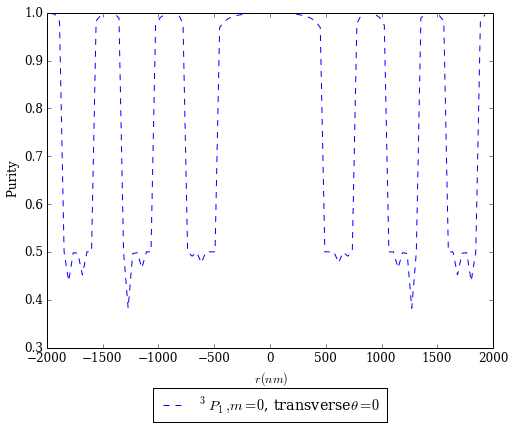

In [347]:
# Beam profile
# Gives the same result as before
# theta = 0 along the E-field axis, deepest gradient

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane                     
lamb = 515.1                        # In units of nm
k = 2 * pi / lamb 
Ptot = 2                            # In uints of mW
w0 = 500                            # In units of nm 
#alpha = lamb / (pi * w0) / 2 
alpha = 0.50
# Peak intensity at the focus
Itot = 2 * Ptot / pi / w0**2        # In units of mW/nm^2
A = sqrt(15 * Itot * 1e-3 / 1e-18 /((1 - 5 / 8 * cos(alpha)**(3/2) * (1 + 3 / 5 * cos(alpha))) * 8 * epsilon_0 * c)) / 5.14220652e11

theta1 = 0
theta2 = pi / 2

R = divide(arange(-24, 24, 0.5), k)
P_3P1m_1 = empty_like(R)
P_3P10_1 = empty_like(R)
P_3P1p_1 = empty_like(R)


for i, _r in enumerate(R):
    Ex_temp = Ex(0,k * _r * sin(alpha), theta1, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta1, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta1, alpha, A)
    result = Conv_spherical_tensor((Ey_temp, Ez_temp, Ex_temp)) 
    P_3P1m_1[i] = result[2][0]
    P_3P10_1[i] = result[2][1]
    P_3P1p_1[i] = result[2][2]


figure = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(R, P_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = 0$, transverse$\theta = %d $ ' % (theta1 * 180 / pi))
#ax1.plot(R, P_3P10_1, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
#ax1.plot(R, P_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.set_xlabel(' $r (nm)$')
ax1.set_ylabel(' Purity')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)


#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)

# Adding magnetic field

/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:55: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:56: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:57: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:65: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:66: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7

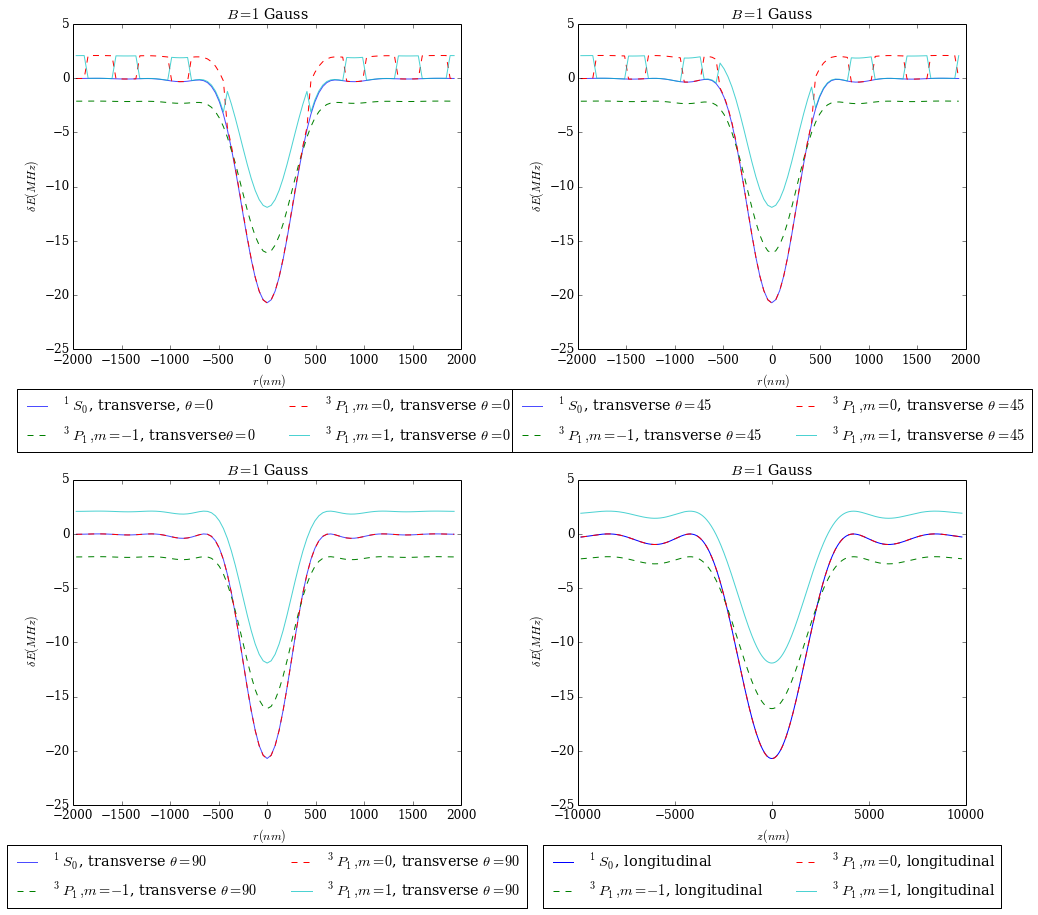

In [368]:
# Beam profile
# Gives the same result as before

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt, pi

# At the focal plane                     
lamb = 515.1                        # In units of nm
k = 2 * pi / lamb 
Ptot = 2                            # In uints of mW
w0 = 500                            # In units of nm 
#alpha = lamb / (pi * w0) / 2 
alpha = 0.50
# Peak intensity at the focus
Itot = 2 * Ptot / pi / w0**2        # In units of mW/nm^2
A = sqrt(15 * Itot * 1e-3 / 1e-18 /((1 - 5 / 8 * cos(alpha)**(3/2) * (1 + 3 / 5 * cos(alpha))) * 8 * epsilon_0 * c)) / 5.14220652e11

B = 1                               # In units of Gauss

theta1 = 0
theta2 = pi / 4
theta3 = pi / 2

R = divide(arange(-24, 24, 0.5), k)
LS_1S0_1 = empty_like(R)
LS_3P1m_1 = empty_like(R)
LS_3P10_1 = empty_like(R)
LS_3P1p_1 = empty_like(R)

LS_1S0_2 = empty_like(R)
LS_3P1m_2 = empty_like(R)
LS_3P10_2 = empty_like(R)
LS_3P1p_2 = empty_like(R)

LS_1S0_3 = empty_like(R)
LS_3P1m_3 = empty_like(R)
LS_3P10_3 = empty_like(R)
LS_3P1p_3 = empty_like(R)

Z = divide(arange(-120, 120, 0.5), k)
LS_1S0_z = empty_like(Z)
LS_3P1m_z = empty_like(Z)
LS_3P10_z = empty_like(Z)
LS_3P1p_z = empty_like(Z)


for i, _r in enumerate(R):
    Ex_temp = Ex(0,k * _r * sin(alpha), theta1, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta1, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta1, alpha, A)
    result = Conv_spherical_tensor_B((Ey_temp, Ez_temp, Ex_temp), B, 1) 
    LS_1S0_1[i] = result[0]
    LS_3P1m_1[i] = result[1][0]
    LS_3P10_1[i] = result[1][1]
    LS_3P1p_1[i] = result[1][2]

    Ex_temp = Ex(0,k * _r * sin(alpha), theta2, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta2, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta2, alpha, A)
    result = Conv_spherical_tensor_B((Ey_temp, Ez_temp, Ex_temp), B, 1)
    LS_1S0_2[i] = result[0]
    LS_3P1m_2[i] = result[1][0] 
    LS_3P10_2[i] = result[1][1] 
    LS_3P1p_2[i] = result[1][2] 
    
    Ex_temp = Ex(0,k * _r * sin(alpha), theta3, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta3, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta3, alpha, A)
    result = Conv_spherical_tensor_B((Ey_temp, Ez_temp, Ex_temp), B, 1)
    LS_1S0_3[i] = result[0] 
    LS_3P1m_3[i] = result[1][0] 
    LS_3P10_3[i] = result[1][1]
    LS_3P1p_3[i] = result[1][2] 


for i, _z in enumerate(Z):
    Ex_temp = Ex(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    Ey_temp = Ey(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    Ez_temp = Ez(k * _z * sin(alpha) ** 2, 0, 0, alpha, A)
    result = Conv_spherical_tensor_B((Ey_temp, Ez_temp, Ex_temp), B, 1)
    LS_1S0_z[i] = result[0] 
    LS_3P1m_z[i] = result[1][0]
    LS_3P10_z[i] = result[1][1]
    LS_3P1p_z[i] = result[1][2]


figure = plt.figure(figsize=(16, 14))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(R, LS_1S0_1, alpha = 0.7, label = r'$^1S_0$, transverse, $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse$\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P10_1, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, LS_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.set_xlabel(' $r (nm)$')
ax1.set_ylabel(' $\delta E (MHz)$')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)
ax1.set_title("$B = 1$ Gauss")

ax2 = plt.subplot(gs[0,1])
ax2.plot(R, LS_1S0_2, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P1m_2, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P10_2, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.plot(R, LS_3P1p_2, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta2 * 180 / pi))
ax2.set_xlabel(' $r (nm)$')
ax2.set_ylabel(' $\delta E (MHz)$')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)
ax2.set_title("$B = 1$ Gauss")

ax3 = plt.subplot(gs[1,0])
ax3.plot(R, LS_1S0_3, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P1m_3, linestyle = '--',  label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P10_3, linestyle = '--', label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.plot(R, LS_3P1p_3, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta3 * 180 / pi))
ax3.set_xlabel(' $r (nm)$')
ax3.set_ylabel(' $\delta E (MHz)$')
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)
ax3.set_title("$B = 1$ Gauss")


ax4 = plt.subplot(gs[1,1]) 
ax4.plot(Z, LS_1S0_z, label = r'$^1S_0$, longitudinal')
ax4.plot(Z, LS_3P1m_z, linestyle = '--',  label = r'$^3P_1, m = -1$, longitudinal')
ax4.plot(Z, LS_3P10_z, linestyle = '--', label = r'$^3P_1, m = 0$, longitudinal')
ax4.plot(Z, LS_3P1p_z, alpha = 0.7, label = r'$^3P_1, m = 1$, longitudinal')
ax4.set_xlabel(' $z (nm)$')
ax4.set_ylabel(' $\delta E (MHz)$')
ax4.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)
ax4.set_title("$B = 1$ Gauss")


#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)

/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:46: ComplexWarning: Casting complex values to real discards the imaginary part


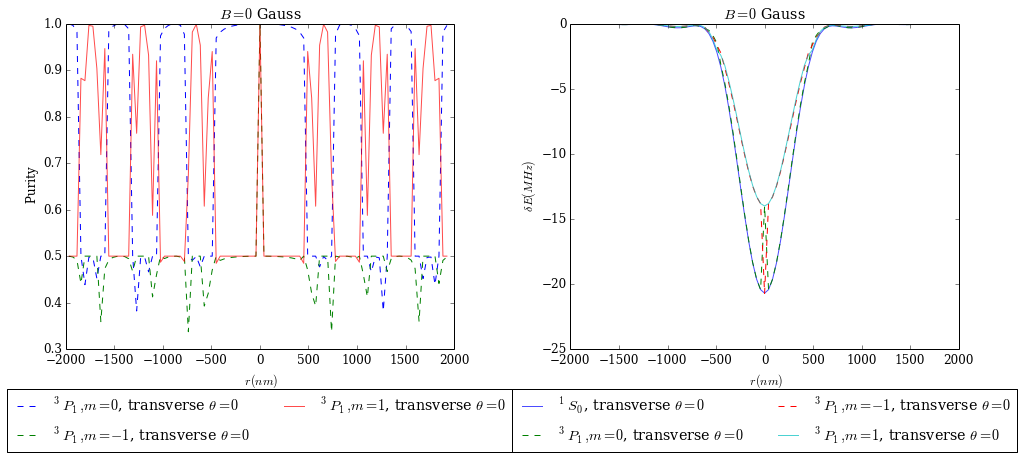

In [384]:
# Beam profile
# Gives the same result as before
# theta = 0 along the E-field axis, deepest gradient

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane                     
lamb = 515.1                        # In units of nm
k = 2 * pi / lamb 
Ptot = 2                            # In uints of mW
w0 = 500                            # In units of nm 
#alpha = lamb / (pi * w0) / 2 
alpha = 0.50
# Peak intensity at the focus
Itot = 2 * Ptot / pi / w0**2        # In units of mW/nm^2
A = sqrt(15 * Itot * 1e-3 / 1e-18 /((1 - 5 / 8 * cos(alpha)**(3/2) * (1 + 3 / 5 * cos(alpha))) * 8 * epsilon_0 * c)) / 5.14220652e11


theta1 = 0
theta2 = pi / 2

R = divide(arange(-24, 24, 0.5), k)
P_3P1m_1 = empty_like(R)
P_3P10_1 = empty_like(R)
P_3P1p_1 = empty_like(R)
LS_1S0_1 = empty_like(R)
LS_3P1m_1 = empty_like(R)
LS_3P10_1 = empty_like(R)
LS_3P1p_1 = empty_like(R)


for i, _r in enumerate(R):
    Ex_temp = Ex(0,k * _r * sin(alpha), theta1, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta1, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta1, alpha, A)
    result = Conv_spherical_tensor_B((Ey_temp, Ez_temp, Ex_temp), 0, -1) 
    P_3P1m_1[i] = result[2][0]
    P_3P10_1[i] = result[2][1]
    P_3P1p_1[i] = result[2][2]
    LS_1S0_1[i] = result[0]
    LS_3P1m_1[i] = result[1][0]
    LS_3P10_1[i] = result[1][1]
    LS_3P1p_1[i] = result[1][2]
    


figure = plt.figure(figsize=(16, 14))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(R, P_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, P_3P10_1, linestyle = '--', label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, P_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
#ax1.set_ylim(0.5,1)
ax1.set_xlabel(' $r (nm)$')
ax1.set_ylabel(' Purity')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)
ax1.set_title("$B = 0$ Gauss")

ax2 = plt.subplot(gs[0,1])
ax2.plot(R, LS_1S0_1, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax2.plot(R, LS_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax2.plot(R, LS_3P10_1, linestyle = '--', label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax2.plot(R, LS_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax2.set_xlabel(' $r (nm)$')
ax2.set_ylabel(' $\delta E (MHz)$')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)
ax2.set_title("$B = 0$ Gauss")
#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)

/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:46: ComplexWarning: Casting complex values to real discards the imaginary part


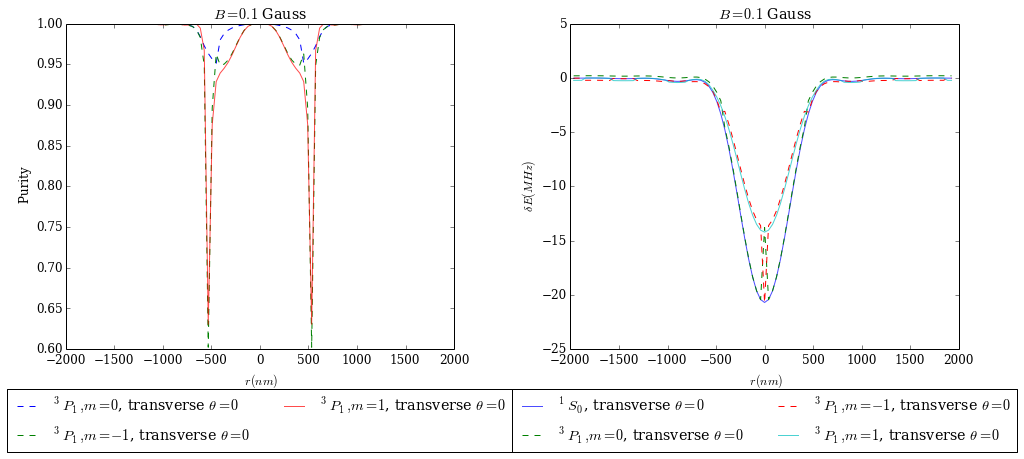

In [385]:
# Beam profile
# Gives the same result as before
# theta = 0 along the E-field axis, deepest gradient

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane                     
lamb = 515.1                        # In units of nm
k = 2 * pi / lamb 
Ptot = 2                            # In uints of mW
w0 = 500                            # In units of nm 
#alpha = lamb / (pi * w0) / 2 
alpha = 0.50
# Peak intensity at the focus
Itot = 2 * Ptot / pi / w0**2        # In units of mW/nm^2
A = sqrt(15 * Itot * 1e-3 / 1e-18 /((1 - 5 / 8 * cos(alpha)**(3/2) * (1 + 3 / 5 * cos(alpha))) * 8 * epsilon_0 * c)) / 5.14220652e11


theta1 = 0
theta2 = pi / 2

R = divide(arange(-24, 24, 0.5), k)
P_3P1m_1 = empty_like(R)
P_3P10_1 = empty_like(R)
P_3P1p_1 = empty_like(R)
LS_1S0_1 = empty_like(R)
LS_3P1m_1 = empty_like(R)
LS_3P10_1 = empty_like(R)
LS_3P1p_1 = empty_like(R)


for i, _r in enumerate(R):
    Ex_temp = Ex(0,k * _r * sin(alpha), theta1, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta1, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta1, alpha, A)
    result = Conv_spherical_tensor_B((Ey_temp, Ez_temp, Ex_temp), 0.1, -1) 
    P_3P1m_1[i] = result[2][0]
    P_3P10_1[i] = result[2][1]
    P_3P1p_1[i] = result[2][2]
    LS_1S0_1[i] = result[0]
    LS_3P1m_1[i] = result[1][0]
    LS_3P10_1[i] = result[1][1]
    LS_3P1p_1[i] = result[1][2]
    


figure = plt.figure(figsize=(16, 14))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(R, P_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, P_3P10_1, linestyle = '--', label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, P_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
#ax1.set_ylim(0.5,1)
ax1.set_xlabel(' $r (nm)$')
ax1.set_ylabel(' Purity')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)
ax1.set_title("$B = 0.1$ Gauss")

ax2 = plt.subplot(gs[0,1])
ax2.plot(R, LS_1S0_1, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax2.plot(R, LS_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax2.plot(R, LS_3P10_1, linestyle = '--', label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax2.plot(R, LS_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax2.set_xlabel(' $r (nm)$')
ax2.set_ylabel(' $\delta E (MHz)$')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)
ax2.set_title("$B = 0.1$ Gauss")
#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)

/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:46: ComplexWarning: Casting complex values to real discards the imaginary part


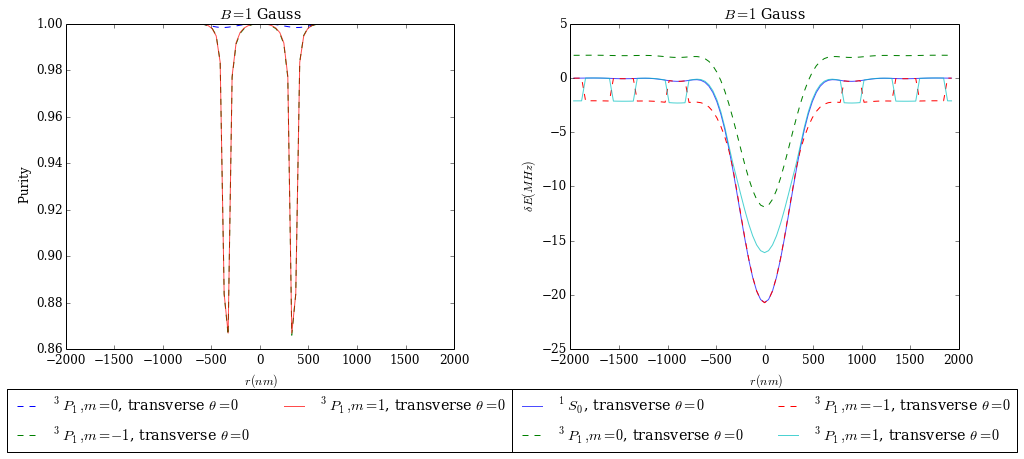

In [386]:
# Beam profile
# Gives the same result as before
# theta = 0 along the E-field axis, deepest gradient

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane                     
lamb = 515.1                        # In units of nm
k = 2 * pi / lamb 
Ptot = 2                            # In uints of mW
w0 = 500                            # In units of nm 
#alpha = lamb / (pi * w0) / 2 
alpha = 0.50
# Peak intensity at the focus
Itot = 2 * Ptot / pi / w0**2        # In units of mW/nm^2
A = sqrt(15 * Itot * 1e-3 / 1e-18 /((1 - 5 / 8 * cos(alpha)**(3/2) * (1 + 3 / 5 * cos(alpha))) * 8 * epsilon_0 * c)) / 5.14220652e11


theta1 = 0
theta2 = pi / 2

R = divide(arange(-24, 24, 0.5), k)
P_3P1m_1 = empty_like(R)
P_3P10_1 = empty_like(R)
P_3P1p_1 = empty_like(R)
LS_1S0_1 = empty_like(R)
LS_3P1m_1 = empty_like(R)
LS_3P10_1 = empty_like(R)
LS_3P1p_1 = empty_like(R)


for i, _r in enumerate(R):
    Ex_temp = Ex(0,k * _r * sin(alpha), theta1, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta1, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta1, alpha, A)
    result = Conv_spherical_tensor_B((Ey_temp, Ez_temp, Ex_temp), 1, -1) 
    P_3P1m_1[i] = result[2][0]
    P_3P10_1[i] = result[2][1]
    P_3P1p_1[i] = result[2][2]
    LS_1S0_1[i] = result[0]
    LS_3P1m_1[i] = result[1][0]
    LS_3P10_1[i] = result[1][1]
    LS_3P1p_1[i] = result[1][2]
    


figure = plt.figure(figsize=(16, 14))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(R, P_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, P_3P10_1, linestyle = '--', label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, P_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
#ax1.set_ylim(0.5,1)
ax1.set_xlabel(' $r (nm)$')
ax1.set_ylabel(' Purity')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)
ax1.set_title("$B = 1$ Gauss")

ax2 = plt.subplot(gs[0,1])
ax2.plot(R, LS_1S0_1, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax2.plot(R, LS_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax2.plot(R, LS_3P10_1, linestyle = '--', label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax2.plot(R, LS_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax2.set_xlabel(' $r (nm)$')
ax2.set_ylabel(' $\delta E (MHz)$')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)
ax2.set_title("$B = 1$ Gauss")
#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)

/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/caridlin/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:46: ComplexWarning: Casting complex values to real discards the imaginary part


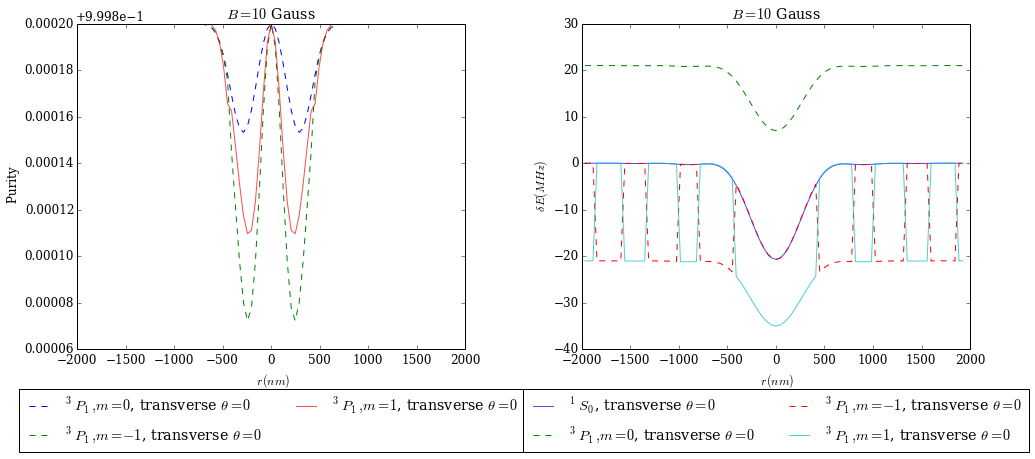

In [387]:
# Beam profile
# Gives the same result as before
# theta = 0 along the E-field axis, deepest gradient

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import ma, meshgrid, arange, empty_like, arctan
from math import sqrt

# At the focal plane                     
lamb = 515.1                        # In units of nm
k = 2 * pi / lamb 
Ptot = 2                            # In uints of mW
w0 = 500                            # In units of nm 
#alpha = lamb / (pi * w0) / 2 
alpha = 0.50
# Peak intensity at the focus
Itot = 2 * Ptot / pi / w0**2        # In units of mW/nm^2
A = sqrt(15 * Itot * 1e-3 / 1e-18 /((1 - 5 / 8 * cos(alpha)**(3/2) * (1 + 3 / 5 * cos(alpha))) * 8 * epsilon_0 * c)) / 5.14220652e11


theta1 = 0
theta2 = pi / 2

R = divide(arange(-24, 24, 0.5), k)
P_3P1m_1 = empty_like(R)
P_3P10_1 = empty_like(R)
P_3P1p_1 = empty_like(R)
LS_1S0_1 = empty_like(R)
LS_3P1m_1 = empty_like(R)
LS_3P10_1 = empty_like(R)
LS_3P1p_1 = empty_like(R)


for i, _r in enumerate(R):
    Ex_temp = Ex(0,k * _r * sin(alpha), theta1, alpha, A)
    Ey_temp = Ey(0,k * _r * sin(alpha), theta1, alpha, A)
    Ez_temp = Ez(0,k * _r * sin(alpha), theta1, alpha, A)
    result = Conv_spherical_tensor_B((Ey_temp, Ez_temp, Ex_temp), 10, -1) 
    P_3P1m_1[i] = result[2][0]
    P_3P10_1[i] = result[2][1]
    P_3P1p_1[i] = result[2][2]
    LS_1S0_1[i] = result[0]
    LS_3P1m_1[i] = result[1][0]
    LS_3P10_1[i] = result[1][1]
    LS_3P1p_1[i] = result[1][2]
    


figure = plt.figure(figsize=(16, 14))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(R, P_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, P_3P10_1, linestyle = '--', label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax1.plot(R, P_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
#ax1.set_ylim(0.5,1)
ax1.set_xlabel(' $r (nm)$')
ax1.set_ylabel(' Purity')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)
ax1.set_title("$B = 10$ Gauss")

ax2 = plt.subplot(gs[0,1])
ax2.plot(R, LS_1S0_1, alpha = 0.7, label = r'$^1S_0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax2.plot(R, LS_3P1m_1, linestyle = '--',  label = r'$^3P_1, m = 0$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax2.plot(R, LS_3P10_1, linestyle = '--', label = r'$^3P_1, m = -1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax2.plot(R, LS_3P1p_1, alpha = 0.7, label = r'$^3P_1, m = 1$, transverse $\theta = %d $ ' % (theta1 * 180 / pi))
ax2.set_xlabel(' $r (nm)$')
ax2.set_ylabel(' $\delta E (MHz)$')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  ncol = 2)
ax2.set_title("$B = 10$ Gauss")
#C = ax1.contour(X, Y, Scale, 50, alpha = 0.75, cmap='RdBu', vmin=z_min, vmax=z_max)
#plt.colorbar(C)